In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, MaxPool2D, Dropout

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# on the left side click Files, then "upload to session storage" the 4 files 

In [4]:
train_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_images.csv', header=None)
train_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_train/train_labels.csv')

In [5]:
test_images = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_images.csv', header=None, names=train_images.columns)
test_labels = pd.read_csv('/content/drive/MyDrive/Tensorflow/Volcanoes_test/test_labels.csv')


In [6]:
train_images2 = train_images
test_images2 = test_images

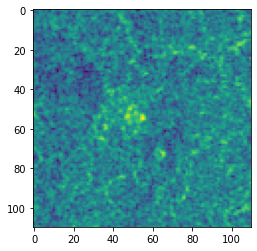

In [7]:
train_labels = train_labels.iloc[:, 0].to_numpy()
test_labels = test_labels.iloc[:, 0].to_numpy()

first = train_images.iloc[0].to_numpy()
first = first.reshape(110, 110)
plt.imshow(first);

##Standardize and Reshape Images

In [8]:
train_images_reshaped = train_images.values.reshape(len(train_images), 110, 110)
train_images_reshaped = train_images_reshaped / 255.0

In [9]:
test_images_reshaped = test_images.values.reshape(len(test_images), 110, 110)
test_images_reshaped = test_images_reshaped / 255.0

##Balance the Dataset a Bit and Augment Images

In [ ]:
data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

# pick random images
n = len(train_images_reshaped)
for index in range(n):

  image = tf.expand_dims(train_images_reshaped[index], 0)
  plt.figure(figsize=(n/2, n/2))
  for i in range(9):
    augmented_image = data_augmentation(image)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image[0])
    plt.axis("off")

    #train_images_reshaped = np.append(train_images_reshaped, augmented_image)

# add these images to training data

In [ ]:
train_images_reshaped = tf.convert_to_tensor(train_images.values.reshape(len(train_images), 110, 110, 1))
test_images_reshaped = tf.convert_to_tensor(test_images.values.reshape(len(test_images), 110, 110, 1))

##Create the Model

In [ ]:

model = models.Sequential()
model.add(layers.Conv2D(6, kernel_size=(3, 3), activation='sigmoid', input_shape = (110, 110, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))

model.add(layers.Dense(12, activation='sigmoid'))


model.add(layers.Flatten())
model.add(layers.Dropout(0.1))

model.add(layers.Dense(1, activation = 'sigmoid'))




model.compile(optimizer="adam",
              loss='binary_crossentropy',
              metrics=['accuracy', "Precision", "Recall"])

In [ ]:
model.summary()

##Train the Model

In [ ]:
history = model.fit(train_images_reshaped, train_labels, epochs=120, 
                    validation_data=(test_images_reshaped, test_labels),
                    batch_size=32)  # we pass the data, labels and epochs and watch the magic!

##Evaluate the Model

In [ ]:
test_loss, test_acc, test_precision, test_recall = model.evaluate(test_images_reshaped, test_labels)

print('Test accuracy:', test_acc)
print('Test precision:', test_precision)
print('Test recall:', test_recall)

In [ ]:
def plotLearningCurves(history):
    fig, ax = plt.subplots(2,2, figsize = (14,6))
    ax[0,0].plot(history.epoch, history.history['loss'], color='b', label="Training loss")
    ax[0,0].plot(history.epoch, history.history['val_loss'], color='r', label="validation loss")
    ax[0,0].legend(loc='best', shadow=True)
    ax[0,0].set_title('loss vs epoch')

    ax[0,1].plot(history.epoch, history.history['accuracy'], color='b', label="Training accuracy")
    ax[0,1].plot(history.epoch, history.history['val_accuracy'], color='r',label="Validation accuracy")
    ax[0,1].legend(loc='best', shadow=True)
    ax[0,1].set_title('accuracy vs epoch')

    ax[1,0].plot(history.epoch, history.history['recall'], color='b', label="Training recall")
    ax[1,0].plot(history.epoch, history.history['val_recall'], color='r',label="Validation recall")
    ax[1,0].legend(loc='best', shadow=True)
    ax[1,0].set_title('recall')

    ax[1,1].plot(history.epoch, history.history['precision'], color='b', label="Training precision")
    ax[1,1].plot(history.epoch, history.history['val_precision'], color='r',label="Validation precision")
    ax[1,1].legend(loc='best', shadow=True)
    ax[1,1].set_title('precision')

plotLearningCurves(history)

In [ ]:

# do this to fine tune
#model.trainable = False

df = pd.DataFrame.from_dict(history.history)
df[df['val_accuracy'] > .9].sort_values(by='val_accuracy', kind="mergesort", ascending=False)